<a href="https://colab.research.google.com/github/vrushabhlandage/Data-analytics/blob/main/usaccidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis : US Accidents


---
* Source: Kaggle " https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents "

* This analysis will help to prevent accidents.
* New learners can avoid places where more accidents have occurred.

---

* *Import essential liebrries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from numpy import dtype
import folium
from folium import plugins
from folium.plugins import HeatMap


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## Download Data

In [ ]:
!kaggle datasets download sobhanmoosavi/us-accidents

 96% 257M/269M [00:02<00:00, 94.5MB/s]
100% 269M/269M [00:02<00:00, 95.1MB/s]


---
* *Assign data to dataframe*
---

In [ ]:
df = pd.read_csv("us-accidents.zip")

In [ ]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Data Prepration and Cleaning

In [ ]:
df.columns 

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

---
* *cheack missing values*
---

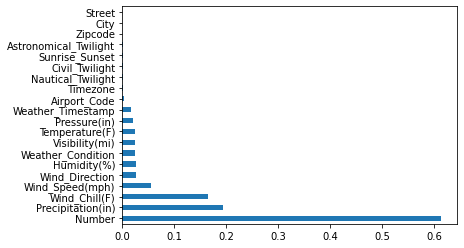

In [ ]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage > 0].plot(kind="barh")

---
* *Remove coloumns which you dont want to use and have more missing values*
---

In [ ]:
df.drop(['Number','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Humidity(%)','Wind_Direction'],axis='columns', inplace=True)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Pressure(in)',
       'Visibility(mi)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

---
* *Number, Precipitation(in), Wind_Chill(F), Wind_Speed(mph), Humidity(%), Wind_Direction these columns are deleted*

---



## Exploratory Analysis And Graphical visualization

## Ask questions to data
---
1.which 5 states have the highest no of accidents.

2.which 20 citys have the highest no of accidents.

3.At what temperature have there been more accidents?

4.What time of the day are accidents most frequent in? 

5.Which days of the week have the most accidents?

6.Which months have the most accidents?

---

In [ ]:
cities_by_accidents = df.City.value_counts()

In [ ]:
cities_by_accidents[0:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

---
* *these are the top 20 cities with most of the accidents*
---

In [ ]:
'New york' in df.City

False

In [ ]:
'New York' in df.City

False

In [ ]:
'NY' in df.City

False

In [ ]:
states_by_accident = df.State.value_counts()

In [ ]:
states_by_accident[0:10]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

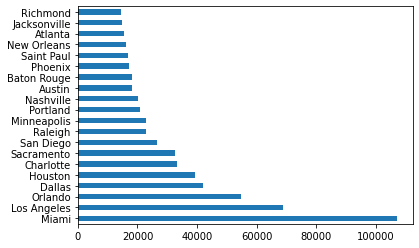

In [ ]:
cities_by_accidents[:20].plot(kind="barh")

---
 * *seperate data in two buckets as greater than thousand and less than thousand*
---

In [ ]:
highaccidentcities = cities_by_accidents[cities_by_accidents >= 1000]
lowaccidentcities = cities_by_accidents[cities_by_accidents < 1000]

In [ ]:
len(highaccidentcities)

496

In [ ]:
len(lowaccidentcities)

11185

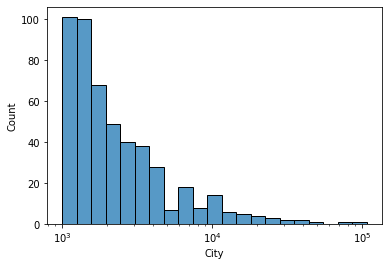

In [ ]:
sn.histplot(highaccidentcities, log_scale=True)

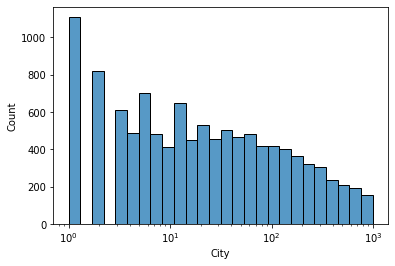

In [ ]:
sn.histplot(lowaccidentcities, log_scale=True)

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

---
* *parse the column to datetime*
---

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

---
* *ceating new column for hour*
---

In [ ]:
df.starthour = df.Start_Time.dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df.starthour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

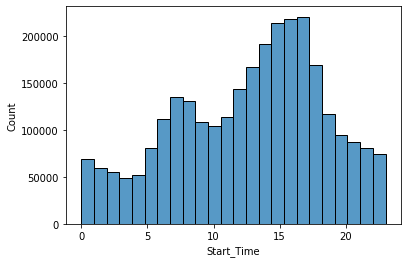

In [ ]:
sn.histplot(df.starthour, bins=24)

---
* *accidents on  weekends*
---

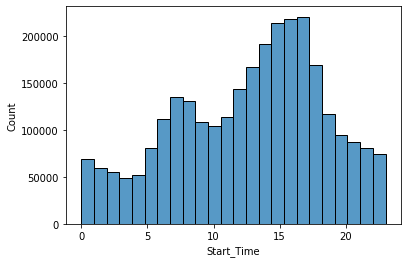

In [ ]:
if [[df.Start_Time.dt.dayofweek] == 5 or 6]:
  sn.histplot(df.Start_Time.dt.hour, bins=24)

In [ ]:
df.day = df.Start_Time.dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df.day

0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64

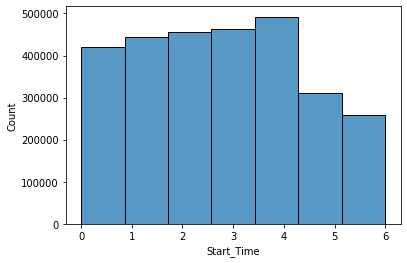

In [ ]:
sn.histplot(df.day, bins=7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


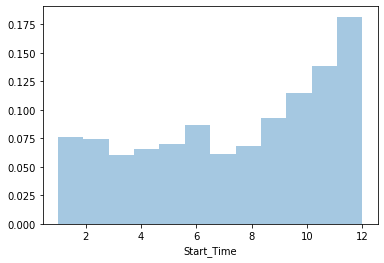

In [ ]:
sn.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [ ]:
latlng =list(zip((df.Start_Lat), (df.Start_Lng)))


In [ ]:
map = folium.Map()
HeatMap(latlng[:1000000]).add_to(map)
map

In [ ]:
df = df.rename(columns={'Temperature(F)': 'Temperature'})

In [ ]:
df.Temperature

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature, Length: 2845342, dtype: float64

In [ ]:
df.Temperature.max()

196.0

In [ ]:
df.Temperature.min()

-89.0

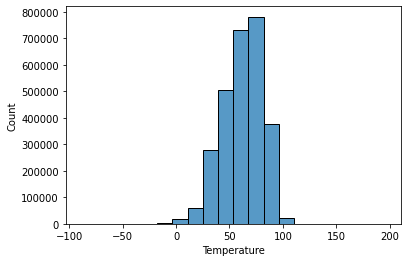

In [ ]:
sn.histplot(df.Temperature, bins=20)

## Summery and Conclusion

---

Insights:

1.No data from New York

2.The number of accidents per city decreases exponentially

3.Less than 5% of cities have more than 1000 yearly accidents.

4.Over 1200 cities have reported just one accident 

5.Is the distribution of accidents by hour the same on weekends as on weekdays.

6.A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
Next higest percentage is 3 pm to 6 pm.

7.Miami, Los Angeles, Orlando, Dallas, Houston these five cities have highest number of accidents.   

8.California, Florida, Texas, Oregon, Virginia these are 5 states have highest number of accidents.   

9.496 cities recorded more than 1000 accidents.

10.on weekends more accidents recorded between 1 am to 5 am (Afternoon time)

11.Accidents on weekends are nearly half of the weekdays. 

12.Winter sesson (Nov, Dec) recorded more accidents.

13.Most Accidents occured in between 30 F to 80 F.

14.HeatMap shows high density in costal areas.






---